In [3]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import MDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.feature_selection import chi2
import os, sys
import glob
import gensim
from gensim.corpora import Dictionary
from gensim.similarities import MatrixSimilarity
from gensim.models import ldamodel, doc2vec, LsiModel, LdaModel, CoherenceModel
from gensim.matutils import kullback_leibler, jaccard, hellinger, sparse2full
import nltk
# nltk.download('punkt')
import string
import csv
import math
import statistics
import datetime
from nltk.corpus import stopwords
from nltk.util import ngrams
# nltk.download('stopwords')
from collections import OrderedDict, Counter, namedtuple
import random
import codecs, difflib, distance
import rpy2
# from datasketch import MinHash
import networkx as nx
import matplotlib.pyplot as plt
from networkx.readwrite import json_graph
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.layouts import row, column
from progress.bar import IncrementalBar
import warnings
warnings.filterwarnings('ignore')
nlp = spacy.load('en_core_web_lg')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# %load_ext rpy2.ipython

In [4]:
import altair as alt

alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [ ]:
### FAST TEXT

In [96]:
redo = final_df
redo.rename(columns={'tokenized_text_x': 'token_lists', 'tokenized_text_y': 'token_texts'}, inplace=True)


In [13]:
df_tokenized[0:5]

date  page_number  \
0  1960-August-14            2   
1  1960-August-14           13   
2  1960-August-14           14   
3  1960-August-14           15   
4  1960-August-14           16   

                                      tokenized_text  
0  [arab observer index vol 1- no 8 august 14 196...  
1  [_cartoons nixon i 'll smash russia 1 ... kenn...  
2  [political round-up unrest spread congo nation...  
3  [political roundup in words belgium incites tr...  
4  [pared provide arms dr. abdel kader hatem depu...

In [42]:
model = gensim.models.FastText(test.tokenized_text[0],iter=5, max_vocab_size=None)

In [57]:
model.wv.most_similar(positive=['congo'], topn=10)

[('liberation', 0.943716287612915),
 ('nations', 0.9437074065208435),
 ('situation', 0.9405162334442139),
 ('independence', 0.939561128616333),
 ('resolution', 0.9349467754364014),
 ('national', 0.9343047142028809),
 ('organisation', 0.9328246116638184),
 ('independent', 0.9320425391197205),
 ('revolution', 0.9314258098602295),
 ('tions', 0.9299207925796509)]

In [53]:
test2 = final_df[1:2]
test2.tokenized_text.tolist()[0]
model2 = gensim.models.FastText(test2.tokenized_text.tolist()[0],iter=5, max_vocab_size=None)

In [56]:
model2.wv.most_similar(positive=['congo'], topn=10)

[('congolese', 0.6562474966049194),
 ('africa', 0.6222743988037109),
 ('african', 0.6142334938049316),
 ('imperialist', 0.5548239350318909),
 ('recognition', 0.5441488027572632),
 ('continent', 0.5415883660316467),
 ('imperialism', 0.5339770317077637),
 ('con-', 0.5336740612983704),
 ('conference', 0.5260177254676819),
 ('relations', 0.5224902629852295)]

In [65]:
test3 = final_df[2:]
test3.tokenized_text.tolist()[0]
model3 = gensim.models.FastText(test3.tokenized_text.tolist()[0],iter=5, max_vocab_size=None)

In [66]:
model3.wv.most_similar(positive=['congo'], topn=10)

[('national', 0.9965524673461914),
 ('nation', 0.9964765310287476),
 ('domination', 0.9962087869644165),
 ('determination', 0.9960592985153198),
 ('international', 0.9960370063781738),
 ('congolese', 0.9960007667541504),
 ('education', 0.9959935545921326),
 ('self-determination', 0.9957852363586426),
 ('nations', 0.9957201480865479),
 ('civilisation', 0.9956919550895691)]

In [7]:
dq = pd.read_csv('../data/combined_year_congo_text_ner.csv')
dq.year.unique()
# dq_1 = dq.loc[dq.date == '1960-June-26' ]
df_1960 = dq.loc[dq.year == 1960 ]
df_1961 = dq.loc[dq.year == 1961 ]
df_1962 = dq.loc[dq.year == 1962 ]
df_1963 = dq.loc[dq.year == 1963 ]
df_1964 = dq.loc[dq.year == 1964 ]
df_1965 = dq.loc[dq.year == 1965 ]
df_1966 = dq.loc[dq.year == 1966 ]

In [53]:
df_1966

Unnamed: 0  year                                        token_texts  \
6           6  1966  ["'s 's 's 's 's ... 10 10 12 1963 1965 1965 1...   

                                         token_lists  page_number  \
6  [["'s", "'s", "'s", "'s", "'s", '...', '318,00...            2   

   word_counts                                               term  
6          415  ['congo congo leopoldville congo leopoldville ...

In [8]:

from ast import literal_eval
zero = literal_eval(df_1960.token_lists.values[0])
one = literal_eval(df_1961.token_lists.values[0])
two = literal_eval(df_1962.token_lists.values[0])
three = literal_eval(df_1963.token_lists.values[0])
four = literal_eval(df_1964.token_lists.values[0])
five = literal_eval(df_1965.token_lists.values[0])
six = literal_eval(df_1966.token_lists.values[0])

In [9]:
dictionary_zero = Dictionary(zero)
corpus_zero = [dictionary_zero.doc2bow(text) for text in zero]
dictionary_one = Dictionary(one)
corpus_one = [dictionary_one.doc2bow(text) for text in one]
dictionary_two = Dictionary(two)
corpus_two = [dictionary_two.doc2bow(text) for text in two]
dictionary_three = Dictionary(three)
corpus_three = [dictionary_three.doc2bow(text) for text in three]
dictionary_four = Dictionary(four)
corpus_four = [dictionary_four.doc2bow(text) for text in four]
dictionary_five = Dictionary(five)
corpus_five = [dictionary_five.doc2bow(text) for text in five]
dictionary_six = Dictionary(six)
corpus_six = [dictionary_six.doc2bow(text) for text in six]

In [12]:
model_zero = LdaModel(corpus=corpus_zero, id2word=dictionary_zero, iterations=50, num_topics=20)
model_one = LdaModel(corpus=corpus_one, id2word=dictionary_one, iterations=50, num_topics=20)
model_two = LdaModel(corpus=corpus_two, id2word=dictionary_two, iterations=50, num_topics=20)
model_three = LdaModel(corpus=corpus_three, id2word=dictionary_three, iterations=50, num_topics=20)
model_four = LdaModel(corpus=corpus_four, id2word=dictionary_four, iterations=50, num_topics=20)
model_five = LdaModel(corpus=corpus_five, id2word=dictionary_five, iterations=50, num_topics=20)
model_six = LdaModel(corpus=corpus_six, id2word=dictionary_six, iterations=50, num_topics=20)

In [14]:
cm_mass_zero = CoherenceModel(model=model_zero, corpus=corpus_zero, dictionary=dictionary_zero, coherence='u_mass')
cm_mass_one = CoherenceModel(model=model_one, corpus=corpus_one, dictionary=dictionary_one, coherence='u_mass')
cm_mass_two = CoherenceModel(model=model_two, corpus=corpus_two, dictionary=dictionary_two, coherence='u_mass')
cm_mass_three = CoherenceModel(model=model_three, corpus=corpus_three, dictionary=dictionary_three, coherence='u_mass')
cm_mass_four = CoherenceModel(model=model_four, corpus=corpus_four, dictionary=dictionary_four, coherence='u_mass')
cm_mass_five = CoherenceModel(model=model_five, corpus=corpus_five, dictionary=dictionary_five, coherence='u_mass')
cm_mass_six = CoherenceModel(model=model_six, corpus=corpus_six, dictionary=dictionary_six, coherence='u_mass')

print('zero mass', cm_mass_zero.get_coherence(),'one mass', cm_mass_one.get_coherence(),'two mass', cm_mass_two.get_coherence(),'three mass', cm_mass_three.get_coherence(),'four mass', cm_mass_four.get_coherence(), 'five mass', cm_mass_five.get_coherence(), 'six mass', cm_mass_six.get_coherence())

zero mass -0.8932164393439936 one mass -0.800109263434695 two mass -1.850305836081032 three mass -0.7146676840830785 four mass -0.611561931708574 five mass -0.5972911960555317 six mass -0.7086207190457519


In [15]:
cm_cv_zero = CoherenceModel(model=model_zero, texts=zero, dictionary=dictionary_zero, coherence='c_v')
cm_cv_one = CoherenceModel(model=model_one, texts=one, dictionary=dictionary_one, coherence='c_v')
cm_cv_two = CoherenceModel(model=model_two, texts=two, dictionary=dictionary_two, coherence='c_v')
cm_cv_three = CoherenceModel(model=model_three, texts=three, dictionary=dictionary_three, coherence='c_v')
cm_cv_four = CoherenceModel(model=model_four, texts=four, dictionary=dictionary_four, coherence='c_v')
cm_cv_five = CoherenceModel(model=model_five, texts=five, dictionary=dictionary_five, coherence='c_v')
cm_cv_six = CoherenceModel(model=model_six, texts=six, dictionary=dictionary_six, coherence='c_v')

print('zero cv', cm_cv_zero.get_coherence(),'one cv', cm_cv_one.get_coherence(),'two cv', cm_cv_two.get_coherence(),'three cv', cm_cv_three.get_coherence(),'four cv', cm_cv_four.get_coherence(), 'five cv', cm_cv_five.get_coherence(), 'six cv', cm_cv_six.get_coherence())

zero cv 0.2690808161760837 one cv 0.2956196454787765 two cv 0.2954889586530424 three cv 0.2444480085059122 four cv 0.25614774841255195 five cv 0.26943326468915074 six cv 0.3493151025646048


In [100]:
topic_dist = goodLdaModel.state.get_lambda()
topic_dist.shape


(10, 8548)

In [90]:
topics

In [89]:
topics = goodLdaModel.get_document_topics(corpus_one, per_word_topics=True)
all_topics = [(doc_topics, word_topics, word_phis) for doc_topics, word_topics, word_phis in topics]
for doc in all_topics:
    print('New Document \n')
    print('Document topic:', doc[0])
    print('Word topic:', doc[1])
    print('Phi value:', doc[2])
    print(" ")
    print('-------------- \n')

New Document 

Document topic: [(4, 0.4372852), (5, 0.55537367)]
Word topic: [(0, [5, 4]), (1, [4, 5]), (2, [4, 5]), (3, [5, 4]), (4, [5, 4]), (5, [5, 4]), (6, [4, 5]), (7, [5, 4]), (8, [5, 4]), (9, [5, 4]), (10, [5, 4]), (11, [4, 5]), (12, [5, 4]), (13, [4, 5]), (14, [5, 4]), (15, [5, 4]), (16, [5, 4]), (17, [4, 5]), (18, [5, 4]), (19, [5, 4]), (20, [5, 4]), (21, [5, 4]), (22, [5, 4]), (23, [5, 4]), (24, [5, 4]), (25, [4, 5]), (26, [4, 5]), (27, [4, 5]), (28, [5, 4]), (29, [5, 4]), (30, [4, 5]), (31, [5, 4]), (32, [4, 5]), (33, [4, 5]), (34, [5, 4]), (35, [5, 4]), (36, [5, 4]), (37, [5, 4]), (38, [5, 4]), (39, [4, 5]), (40, [5, 4]), (41, [4, 5]), (42, [5, 4]), (43, [5, 4]), (44, [5, 4]), (45, [5, 4]), (46, [5, 4]), (47, [5, 4]), (48, [4, 5]), (49, [4, 5]), (50, [4, 5]), (51, [4, 5]), (52, [4, 5]), (53, [5, 4]), (54, [5, 4]), (55, [5, 4]), (56, [4, 5]), (57, [4, 5]), (58, [5, 4]), (59, [5, 4]), (60, [5, 4]), (61, [4, 5]), (62, [4, 5]), (63, [4, 5]), (64, [4, 5]), (65, [4, 5]), (66, [4,

In [106]:
# plt.figure(figsize=(16,14))
# plt.pcolor(topic_dist, norm=None, cmap='Blues')

# plt.yticks(np.arange(topic_dist.shape[0])+0.5);
# N, K = topic_dist.shape
# topic_labels = ['Topic #{}'.format(k) for k in range(K)]
# plt.xticks(np.arange(topic_dist.shape[1])+0.5)
# # ax = plt.gca()
# # ax.tick_params(axis='x', which='major', labelsize=15)
# # ax.tick_params(axis='y', which='major', labelsize=8)
# plt.gca().invert_yaxis()
# plt.xticks(rotation=90)
# plt.colorbar(cmap='Blues')
# plt.tight_layout()
# plt.show()

In [157]:
goodLdaModel.show_topics(num_topics=50,formatted=False,num_words=20)

[(0,
  [('«', 0.009028968),
   ('congo', 0.008450798),
   ("'s", 0.0076252446),
   ('african', 0.006285973),
   ('arab', 0.005235646),
   ('world', 0.004627332),
   ('africa', 0.004468493),
   ('people', 0.0041783256),
   ('israel', 0.0041272533),
   ('said', 0.0041264645),
   ('would', 0.0037115254),
   ('nations', 0.0033452162),
   ('president', 0.0031345559),
   ('states', 0.0031162952),
   ('...', 0.003115334),
   ('united', 0.0031077836),
   ('government', 0.0028772426),
   ('french', 0.0025844185),
   ('uar', 0.0025656242),
   ('independence', 0.0024004357)]),
 (1,
  [("'s", 0.011735896),
   ('«', 0.011052704),
   ('congo', 0.007857334),
   ('arab', 0.0077357814),
   ('african', 0.00499343),
   ('people', 0.004646114),
   ('united', 0.004322139),
   ('said', 0.0042292196),
   ('states', 0.004137287),
   ('president', 0.00410996),
   ('government', 0.0040370133),
   ('world', 0.00371341),
   ('israel', 0.003462448),
   ('would', 0.0034019595),
   ('independence', 0.0032942463),
  

In [158]:
test_1 = goodLdaModel.show_topic(0, topn=len(goodLdaModel.id2word))
# print(test_1)
test_2=goodLdaModel.show_topic(1, topn=len(goodLdaModel.id2word))
def make_topics_bow(topic):
#     print(topic)
#     # takes the string returned by model.show_topics()
#     # split on strings to get topics and the probabilities
#     topic = topic.split('+')
#     # list to store topic bows
    topic_bow = []
    for word in topic:
#         print(word)
#         # split probability and word
        word, prob = word
#         # get rid of spaces
        word = word.replace(" ","")
#         # convert to word_type
        word = goodLdaModel.id2word.doc2bow([word])[0][0]
        topic_bow.append((word, float(prob)))
    return topic_bow

finance_distribution = make_topics_bow(test_1)
water_distribution = make_topics_bow(test_2)

In [159]:
h = hellinger(water_distribution, finance_distribution)
kl = kullback_leibler(water_distribution, finance_distribution)
print(h, kl)

0.08856598232837894 0.031551287


In [160]:
all_topics = goodLdaModel.get_document_topics(corpus_one, per_word_topics=True)
len(all_topics)
output_path = '1960_congo_lda_words.csv'
counter = 0
for doc_topics, word_topics, phi_values in all_topics:
    print(counter)
    
    for topic in doc_topics:
        print('top', topic[0])
        for (w, weight) in goodLdaModel.show_topic(topic[0], topn=20):
            print(w, weight)
        
            d = {}
            d['word'] = w
            d['doc_page'] = counter
            d['year'] = 1960
            d['word_weight'] = weight
            d['topic_id'] = topic[0]
            d['topic_weight'] = topic[1]
            dl = pd.DataFrame().append(d, ignore_index=True)
            if os.path.exists(output_path):
                dl.to_csv(output_path, mode='a', header=False, index=False)
            else:
                dl.to_csv(output_path, header=True, index=False)
    counter= counter+1

0
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.003462448
would 0.0034019595
independence 0.0032942463
uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.002787524
top 2
« 0.008852426
's 0.00793861
congo 0.007554036
united 0.005322046
african 0.0051762783
arab 0.0046083215
said 0.004476011
uar 0.004137616
world 0.0038966252
government 0.0038489776
president 0.0038458833
israel 0.003347239
nations 0.0032992421
people 0.003262567
africa 0.0032544718
two 0.003185083
country 0.0026754686
would 0.0026016803
cairo 0.0025958961
one 0.0025664668
top 4
's 0.010351942
congo 0.008982594
« 0.007472122
african 0.005651578
arab 0.004924985
said 0.004734529
united 0.004492018
president 0.0042867884
israel 0.00413975
people 0.0040212204
would 0.0034832289
africa 0.003096722
states 0

uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.002787524
top 2
« 0.008852426
's 0.00793861
congo 0.007554036
united 0.005322046
african 0.0051762783
arab 0.0046083215
said 0.004476011
uar 0.004137616
world 0.0038966252
government 0.0038489776
president 0.0038458833
israel 0.003347239
nations 0.0032992421
people 0.003262567
africa 0.0032544718
two 0.003185083
country 0.0026754686
would 0.0026016803
cairo 0.0025958961
one 0.0025664668
top 3
's 0.010839561
« 0.0098432815
congo 0.007391897
african 0.0057226853
united 0.0052776258
said 0.0051836157
nations 0.0048032696
people 0.004097009
world 0.004005639
arab 0.0034284492
would 0.0034111373
president 0.0032935664
states 0.003282665
government 0.0031775627
africa 0.0031181066
countries 0.0029512313
two 0.0029102187
also 0.0027094737
new 0.0026792705
israel 0.002670928
top 4
's 0.010351942
congo 0.008982594
« 0.007472122
african 0.005651578
arab 0.004924985
said 0.004734529
united 0.004492018
president 0.

president 0.0042867884
israel 0.00413975
people 0.0040212204
would 0.0034832289
africa 0.003096722
states 0.0030804204
world 0.0030045372
countries 0.0029920705
new 0.002900093
uar 0.0028908032
government 0.0028680724
country 0.00268355
french 0.00263043
top 5
« 0.009187914
's 0.007554875
congo 0.0075029097
arab 0.0053158076
african 0.0052834335
said 0.004944952
nations 0.004623119
world 0.004567072
states 0.004327938
africa 0.0040175915
israel 0.003917948
people 0.00364586
united 0.0034585176
would 0.0034443669
independence 0.00293803
two 0.002895432
also 0.0028500566
president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.0030136632
africa 0.0028651038
uar 0.002685967
government 0.0025574223
forces 0.00254

two 0.002895432
also 0.0028500566
president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.0030136632
africa 0.0028651038
uar 0.002685967
government 0.0025574223
forces 0.0025401206
... 0.0025243463
top 7
congo 0.007808216
's 0.007640109
united 0.006185809
« 0.0057191374
nations 0.005663474
african 0.0052443966
said 0.0049492777
africa 0.004827082
arab 0.00467095
uar 0.0042452663
people 0.004004024
president 0.003725568
government 0.003613363
states 0.003600263
world 0.0034459792
would 0.0034106327
two 0.0028755516
imperialism 0.0028174075
new 0.0027239982
also 0.002489205
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0

also 0.002489205
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.0029283087
imperialism 0.002888127
two 0.0028857514
top 9
« 0.008841332
's 0.006547044
congo 0.006353985
arab 0.004876184
israel 0.004468226
african 0.0044153663
united 0.004382483
said 0.0042603095
would 0.003819432
president 0.0037516267
nations 0.003654431
states 0.003516406
two 0.0034348753
africa 0.003386388
independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
11
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0

« 0.007472122
african 0.005651578
arab 0.004924985
said 0.004734529
united 0.004492018
president 0.0042867884
israel 0.00413975
people 0.0040212204
would 0.0034832289
africa 0.003096722
states 0.0030804204
world 0.0030045372
countries 0.0029920705
new 0.002900093
uar 0.0028908032
government 0.0028680724
country 0.00268355
french 0.00263043
top 5
« 0.009187914
's 0.007554875
congo 0.0075029097
arab 0.0053158076
african 0.0052834335
said 0.004944952
nations 0.004623119
world 0.004567072
states 0.004327938
africa 0.0040175915
israel 0.003917948
people 0.00364586
united 0.0034585176
would 0.0034443669
independence 0.00293803
two 0.002895432
also 0.0028500566
president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 

president 0.0038458833
israel 0.003347239
nations 0.0032992421
people 0.003262567
africa 0.0032544718
two 0.003185083
country 0.0026754686
would 0.0026016803
cairo 0.0025958961
one 0.0025664668
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.0029283087
imperialism 0.002888127
two 0.0028857514
17
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.003462448
would 0.0034019595
independence 0.0032942463
uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.002787524
top 8
« 0.009462523
'

world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.0029283087
imperialism 0.002888127
two 0.0028857514
top 9
« 0.008841332
's 0.006547044
congo 0.006353985
arab 0.004876184
israel 0.004468226
african 0.0044153663
united 0.004382483
said 0.0042603095
would 0.003819432
president 0.0037516267
nations 0.003654431
states 0.003516406
two 0.0034348753
africa 0.003386388
independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
20
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.0030136632
africa 0.0028651038
uar 0.0026859

uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.002787524
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.0030136632
africa 0.0028651038
uar 0.002685967
government 0.0025574223
forces 0.0025401206
... 0.0025243463
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.0029283087
imperialism 0.002888127
two 0.0028857514
24
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.0

arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.0029283087
imperialism 0.002888127
two 0.0028857514
top 9
« 0.008841332
's 0.006547044
congo 0.006353985
arab 0.004876184
israel 0.004468226
african 0.0044153663
united 0.004382483
said 0.0042603095
would 0.003819432
president 0.0037516267
nations 0.003654431
states 0.003516406
two 0.0034348753
africa 0.003386388
independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
27
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0037115254
nations 0.0033452162
president 0.0031345559
states 0.0031162

states 0.0030804204
world 0.0030045372
countries 0.0029920705
new 0.002900093
uar 0.0028908032
government 0.0028680724
country 0.00268355
french 0.00263043
top 5
« 0.009187914
's 0.007554875
congo 0.0075029097
arab 0.0053158076
african 0.0052834335
said 0.004944952
nations 0.004623119
world 0.004567072
states 0.004327938
africa 0.0040175915
israel 0.003917948
people 0.00364586
united 0.0034585176
would 0.0034443669
independence 0.00293803
two 0.002895432
also 0.0028500566
president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.0030136632
africa 0.0028651038
uar 0.002685967
government 0.0025574223
forces 0.0025401206
... 0.0025243463
top 7
congo 0.007808216
's 0.007640109
united 0.006185809
« 0.0057191374
nat

... 0.0025243463
33
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0037115254
nations 0.0033452162
president 0.0031345559
states 0.0031162952
... 0.003115334
united 0.0031077836
government 0.0028772426
french 0.0025844185
uar 0.0025656242
independence 0.0024004357
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.003462448
would 0.0034019595
independence 0.0032942463
uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.002787524
top 2
« 0.008852426
's 0.00793861
congo 0.007554036
united 0.005322046
african 0.0051762783
arab 0.0046083215
said 0.004476011
uar 0.004137616
world 0.0038966252
government 0.0038489776
president 0.00384

said 0.004944952
nations 0.004623119
world 0.004567072
states 0.004327938
africa 0.0040175915
israel 0.003917948
people 0.00364586
united 0.0034585176
would 0.0034443669
independence 0.00293803
two 0.002895432
also 0.0028500566
president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.0030136632
africa 0.0028651038
uar 0.002685967
government 0.0025574223
forces 0.0025401206
... 0.0025243463
top 7
congo 0.007808216
's 0.007640109
united 0.006185809
« 0.0057191374
nations 0.005663474
african 0.0052443966
said 0.0049492777
africa 0.004827082
arab 0.00467095
uar 0.0042452663
people 0.004004024
president 0.003725568
government 0.003613363
states 0.003600263
world 0.0034459792
would 0.0034106327
two 0.0028755516
imp

states 0.003516406
two 0.0034348753
africa 0.003386388
independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
38
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0037115254
nations 0.0033452162
president 0.0031345559
states 0.0031162952
... 0.003115334
united 0.0031077836
government 0.0028772426
french 0.0025844185
uar 0.0025656242
independence 0.0024004357
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.003462448
would 0.0034019595
independence 0.0032942463
uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.002787524
top 2
« 0.008852426
's 0.00793861
congo 

arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.0029283087
imperialism 0.002888127
two 0.0028857514
top 9
« 0.008841332
's 0.006547044
congo 0.006353985
arab 0.004876184
israel 0.004468226
african 0.0044153663
united 0.004382483
said 0.0042603095
would 0.003819432
president 0.0037516267
nations 0.003654431
states 0.003516406
two 0.0034348753
africa 0.003386388
independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
41
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0037115254
nations 0.0033452162
president 0.0031345559
states 0.0031162

independence 0.0024004357
top 2
« 0.008852426
's 0.00793861
congo 0.007554036
united 0.005322046
african 0.0051762783
arab 0.0046083215
said 0.004476011
uar 0.004137616
world 0.0038966252
government 0.0038489776
president 0.0038458833
israel 0.003347239
nations 0.0032992421
people 0.003262567
africa 0.0032544718
two 0.003185083
country 0.0026754686
would 0.0026016803
cairo 0.0025958961
one 0.0025664668
top 5
« 0.009187914
's 0.007554875
congo 0.0075029097
arab 0.0053158076
african 0.0052834335
said 0.004944952
nations 0.004623119
world 0.004567072
states 0.004327938
africa 0.0040175915
israel 0.003917948
people 0.00364586
united 0.0034585176
would 0.0034443669
independence 0.00293803
two 0.002895432
also 0.0028500566
president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
indep

africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0037115254
nations 0.0033452162
president 0.0031345559
states 0.0031162952
... 0.003115334
united 0.0031077836
government 0.0028772426
french 0.0025844185
uar 0.0025656242
independence 0.0024004357
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.003462448
would 0.0034019595
independence 0.0032942463
uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.002787524
top 5
« 0.009187914
's 0.007554875
congo 0.0075029097
arab 0.0053158076
african 0.0052834335
said 0.004944952
nations 0.004623119
world 0.004567072
states 0.004327938
africa 0.0040175915
israel 0.003917948
people 0.00364586
united 0.0034585176
would 0.0034443669
independence 0.00293803
two 0.002895432
also 0.0028500566
president 0

president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.0030136632
africa 0.0028651038
uar 0.002685967
government 0.0025574223
forces 0.0025401206
... 0.0025243463
top 7
congo 0.007808216
's 0.007640109
united 0.006185809
« 0.0057191374
nations 0.005663474
african 0.0052443966
said 0.0049492777
africa 0.004827082
arab 0.00467095
uar 0.0042452663
people 0.004004024
president 0.003725568
government 0.003613363
states 0.003600263
world 0.0034459792
would 0.0034106327
two 0.0028755516
imperialism 0.0028174075
new 0.0027239982
also 0.002489205
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
s

independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
53
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0037115254
nations 0.0033452162
president 0.0031345559
states 0.0031162952
... 0.003115334
united 0.0031077836
government 0.0028772426
french 0.0025844185
uar 0.0025656242
independence 0.0024004357
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.003462448
would 0.0034019595
independence 0.0032942463
uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.002787524
top 2
« 0.008852426
's 0.00793861
congo 0.007554036
united 0.005322046
african 0.0051762783
ara

imperialism 0.002888127
two 0.0028857514
56
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0037115254
nations 0.0033452162
president 0.0031345559
states 0.0031162952
... 0.003115334
united 0.0031077836
government 0.0028772426
french 0.0025844185
uar 0.0025656242
independence 0.0024004357
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.003462448
would 0.0034019595
independence 0.0032942463
uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.002787524
top 2
« 0.008852426
's 0.00793861
congo 0.007554036
united 0.005322046
african 0.0051762783
arab 0.0046083215
said 0.004476011
uar 0.004137616
world 0.0038966252
government 0.0038

africa 0.0032544718
two 0.003185083
country 0.0026754686
would 0.0026016803
cairo 0.0025958961
one 0.0025664668
top 3
's 0.010839561
« 0.0098432815
congo 0.007391897
african 0.0057226853
united 0.0052776258
said 0.0051836157
nations 0.0048032696
people 0.004097009
world 0.004005639
arab 0.0034284492
would 0.0034111373
president 0.0032935664
states 0.003282665
government 0.0031775627
africa 0.0031181066
countries 0.0029512313
two 0.0029102187
also 0.0027094737
new 0.0026792705
israel 0.002670928
top 4
's 0.010351942
congo 0.008982594
« 0.007472122
african 0.005651578
arab 0.004924985
said 0.004734529
united 0.004492018
president 0.0042867884
israel 0.00413975
people 0.0040212204
would 0.0034832289
africa 0.003096722
states 0.0030804204
world 0.0030045372
countries 0.0029920705
new 0.002900093
uar 0.0028908032
government 0.0028680724
country 0.00268355
french 0.00263043
top 5
« 0.009187914
's 0.007554875
congo 0.0075029097
arab 0.0053158076
african 0.0052834335
said 0.004944952
nations 0

president 0.0037516267
nations 0.003654431
states 0.003516406
two 0.0034348753
africa 0.003386388
independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
61
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0037115254
nations 0.0033452162
president 0.0031345559
states 0.0031162952
... 0.003115334
united 0.0031077836
government 0.0028772426
french 0.0025844185
uar 0.0025656242
independence 0.0024004357
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.003462448
would 0.0034019595
independence 0.0032942463
uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.0027875

united 0.005322046
african 0.0051762783
arab 0.0046083215
said 0.004476011
uar 0.004137616
world 0.0038966252
government 0.0038489776
president 0.0038458833
israel 0.003347239
nations 0.0032992421
people 0.003262567
africa 0.0032544718
two 0.003185083
country 0.0026754686
would 0.0026016803
cairo 0.0025958961
one 0.0025664668
top 3
's 0.010839561
« 0.0098432815
congo 0.007391897
african 0.0057226853
united 0.0052776258
said 0.0051836157
nations 0.0048032696
people 0.004097009
world 0.004005639
arab 0.0034284492
would 0.0034111373
president 0.0032935664
states 0.003282665
government 0.0031775627
africa 0.0031181066
countries 0.0029512313
two 0.0029102187
also 0.0027094737
new 0.0026792705
israel 0.002670928
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.00301

israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.0029283087
imperialism 0.002888127
two 0.0028857514
top 9
« 0.008841332
's 0.006547044
congo 0.006353985
arab 0.004876184
israel 0.004468226
african 0.0044153663
united 0.004382483
said 0.0042603095
would 0.003819432
president 0.0037516267
nations 0.003654431
states 0.003516406
two 0.0034348753
africa 0.003386388
independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
67
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.003462448
would 0.0034019595
independence 0.0032942463
uar 0.0032340316
nations 0.0031958686
cairo 0.00317

forces 0.0025401206
... 0.0025243463
top 7
congo 0.007808216
's 0.007640109
united 0.006185809
« 0.0057191374
nations 0.005663474
african 0.0052443966
said 0.0049492777
africa 0.004827082
arab 0.00467095
uar 0.0042452663
people 0.004004024
president 0.003725568
government 0.003613363
states 0.003600263
world 0.0034459792
would 0.0034106327
two 0.0028755516
imperialism 0.0028174075
new 0.0027239982
also 0.002489205
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.0029283087
imperialism 0.002888127
two 0.0028857514
top 9
« 0.008841332
's 0.006547044
congo 0.006353985
arab 0.004876184
israel 0.004468226
african 0.0044153663
united 0.004382483
said 0.0042603095
would 0.003819432
president 0.00375162

top 3
's 0.010839561
« 0.0098432815
congo 0.007391897
african 0.0057226853
united 0.0052776258
said 0.0051836157
nations 0.0048032696
people 0.004097009
world 0.004005639
arab 0.0034284492
would 0.0034111373
president 0.0032935664
states 0.003282665
government 0.0031775627
africa 0.0031181066
countries 0.0029512313
two 0.0029102187
also 0.0027094737
new 0.0026792705
israel 0.002670928
top 4
's 0.010351942
congo 0.008982594
« 0.007472122
african 0.005651578
arab 0.004924985
said 0.004734529
united 0.004492018
president 0.0042867884
israel 0.00413975
people 0.0040212204
would 0.0034832289
africa 0.003096722
states 0.0030804204
world 0.0030045372
countries 0.0029920705
new 0.002900093
uar 0.0028908032
government 0.0028680724
country 0.00268355
french 0.00263043
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467

's 0.006547044
congo 0.006353985
arab 0.004876184
israel 0.004468226
african 0.0044153663
united 0.004382483
said 0.0042603095
would 0.003819432
president 0.0037516267
nations 0.003654431
states 0.003516406
two 0.0034348753
africa 0.003386388
independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
75
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0037115254
nations 0.0033452162
president 0.0031345559
states 0.0031162952
... 0.003115334
united 0.0031077836
government 0.0028772426
french 0.0025844185
uar 0.0025656242
independence 0.0024004357
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.0

israel 0.002670928
top 4
's 0.010351942
congo 0.008982594
« 0.007472122
african 0.005651578
arab 0.004924985
said 0.004734529
united 0.004492018
president 0.0042867884
israel 0.00413975
people 0.0040212204
would 0.0034832289
africa 0.003096722
states 0.0030804204
world 0.0030045372
countries 0.0029920705
new 0.002900093
uar 0.0028908032
government 0.0028680724
country 0.00268355
french 0.00263043
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.0030136632
africa 0.0028651038
uar 0.002685967
government 0.0025574223
forces 0.0025401206
... 0.0025243463
top 7
congo 0.007808216
's 0.007640109
united 0.006185809
« 0.0057191374
nations 0.005663474
african 0.0052443966
said 0.0049492777
africa 0.004827082
arab 0.00467095
uar 0.0042452663
people 0.004004024
president 

countries 0.0029512313
two 0.0029102187
also 0.0027094737
new 0.0026792705
israel 0.002670928
top 4
's 0.010351942
congo 0.008982594
« 0.007472122
african 0.005651578
arab 0.004924985
said 0.004734529
united 0.004492018
president 0.0042867884
israel 0.00413975
people 0.0040212204
would 0.0034832289
africa 0.003096722
states 0.0030804204
world 0.0030045372
countries 0.0029920705
new 0.002900093
uar 0.0028908032
government 0.0028680724
country 0.00268355
french 0.00263043
top 5
« 0.009187914
's 0.007554875
congo 0.0075029097
arab 0.0053158076
african 0.0052834335
said 0.004944952
nations 0.004623119
world 0.004567072
states 0.004327938
africa 0.0040175915
israel 0.003917948
people 0.00364586
united 0.0034585176
would 0.0034443669
independence 0.00293803
two 0.002895432
also 0.0028500566
president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.00444

nations 0.0032992421
people 0.003262567
africa 0.0032544718
two 0.003185083
country 0.0026754686
would 0.0026016803
cairo 0.0025958961
one 0.0025664668
top 4
's 0.010351942
congo 0.008982594
« 0.007472122
african 0.005651578
arab 0.004924985
said 0.004734529
united 0.004492018
president 0.0042867884
israel 0.00413975
people 0.0040212204
would 0.0034832289
africa 0.003096722
states 0.0030804204
world 0.0030045372
countries 0.0029920705
new 0.002900093
uar 0.0028908032
government 0.0028680724
country 0.00268355
french 0.00263043
top 5
« 0.009187914
's 0.007554875
congo 0.0075029097
arab 0.0053158076
african 0.0052834335
said 0.004944952
nations 0.004623119
world 0.004567072
states 0.004327938
africa 0.0040175915
israel 0.003917948
people 0.00364586
united 0.0034585176
would 0.0034443669
independence 0.00293803
two 0.002895432
also 0.0028500566
president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061

two 0.0028755516
imperialism 0.0028174075
new 0.0027239982
also 0.002489205
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.0029283087
imperialism 0.002888127
two 0.0028857514
top 9
« 0.008841332
's 0.006547044
congo 0.006353985
arab 0.004876184
israel 0.004468226
african 0.0044153663
united 0.004382483
said 0.0042603095
would 0.003819432
president 0.0037516267
nations 0.003654431
states 0.003516406
two 0.0034348753
africa 0.003386388
independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
87
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0

congo 0.007554036
united 0.005322046
african 0.0051762783
arab 0.0046083215
said 0.004476011
uar 0.004137616
world 0.0038966252
government 0.0038489776
president 0.0038458833
israel 0.003347239
nations 0.0032992421
people 0.003262567
africa 0.0032544718
two 0.003185083
country 0.0026754686
would 0.0026016803
cairo 0.0025958961
one 0.0025664668
top 3
's 0.010839561
« 0.0098432815
congo 0.007391897
african 0.0057226853
united 0.0052776258
said 0.0051836157
nations 0.0048032696
people 0.004097009
world 0.004005639
arab 0.0034284492
would 0.0034111373
president 0.0032935664
states 0.003282665
government 0.0031775627
africa 0.0031181066
countries 0.0029512313
two 0.0029102187
also 0.0027094737
new 0.0026792705
israel 0.002670928
top 4
's 0.010351942
congo 0.008982594
« 0.007472122
african 0.005651578
arab 0.004924985
said 0.004734529
united 0.004492018
president 0.0042867884
israel 0.00413975
people 0.0040212204
would 0.0034832289
africa 0.003096722
states 0.0030804204
world 0.0030045372
co

congo 0.008982594
« 0.007472122
african 0.005651578
arab 0.004924985
said 0.004734529
united 0.004492018
president 0.0042867884
israel 0.00413975
people 0.0040212204
would 0.0034832289
africa 0.003096722
states 0.0030804204
world 0.0030045372
countries 0.0029920705
new 0.002900093
uar 0.0028908032
government 0.0028680724
country 0.00268355
french 0.00263043
top 5
« 0.009187914
's 0.007554875
congo 0.0075029097
arab 0.0053158076
african 0.0052834335
said 0.004944952
nations 0.004623119
world 0.004567072
states 0.004327938
africa 0.0040175915
israel 0.003917948
people 0.00364586
united 0.0034585176
would 0.0034443669
independence 0.00293803
two 0.002895432
also 0.0028500566
president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.

government 0.0038489776
president 0.0038458833
israel 0.003347239
nations 0.0032992421
people 0.003262567
africa 0.0032544718
two 0.003185083
country 0.0026754686
would 0.0026016803
cairo 0.0025958961
one 0.0025664668
top 3
's 0.010839561
« 0.0098432815
congo 0.007391897
african 0.0057226853
united 0.0052776258
said 0.0051836157
nations 0.0048032696
people 0.004097009
world 0.004005639
arab 0.0034284492
would 0.0034111373
president 0.0032935664
states 0.003282665
government 0.0031775627
africa 0.0031181066
countries 0.0029512313
two 0.0029102187
also 0.0027094737
new 0.0026792705
israel 0.002670928
top 5
« 0.009187914
's 0.007554875
congo 0.0075029097
arab 0.0053158076
african 0.0052834335
said 0.004944952
nations 0.004623119
world 0.004567072
states 0.004327938
africa 0.0040175915
israel 0.003917948
people 0.00364586
united 0.0034585176
would 0.0034443669
independence 0.00293803
two 0.002895432
also 0.0028500566
president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012

world 0.0034459792
would 0.0034106327
two 0.0028755516
imperialism 0.0028174075
new 0.0027239982
also 0.002489205
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.0029283087
imperialism 0.002888127
two 0.0028857514
top 9
« 0.008841332
's 0.006547044
congo 0.006353985
arab 0.004876184
israel 0.004468226
african 0.0044153663
united 0.004382483
said 0.0042603095
would 0.003819432
president 0.0037516267
nations 0.003654431
states 0.003516406
two 0.0034348753
africa 0.003386388
independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
97
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
peopl

would 0.0034443669
independence 0.00293803
two 0.002895432
also 0.0028500566
president 0.0028086405
one 0.002750802
peoples 0.0026727966
top 6
« 0.012598205
's 0.007960761
congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.0030136632
africa 0.0028651038
uar 0.002685967
government 0.0025574223
forces 0.0025401206
... 0.0025243463
top 7
congo 0.007808216
's 0.007640109
united 0.006185809
« 0.0057191374
nations 0.005663474
african 0.0052443966
said 0.0049492777
africa 0.004827082
arab 0.00467095
uar 0.0042452663
people 0.004004024
president 0.003725568
government 0.003613363
states 0.003600263
world 0.0034459792
would 0.0034106327
two 0.0028755516
imperialism 0.0028174075
new 0.0027239982
also 0.002489205
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
unit

's 0.007640109
united 0.006185809
« 0.0057191374
nations 0.005663474
african 0.0052443966
said 0.0049492777
africa 0.004827082
arab 0.00467095
uar 0.0042452663
people 0.004004024
president 0.003725568
government 0.003613363
states 0.003600263
world 0.0034459792
would 0.0034106327
two 0.0028755516
imperialism 0.0028174075
new 0.0027239982
also 0.002489205
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.0029283087
imperialism 0.002888127
two 0.0028857514
top 9
« 0.008841332
's 0.006547044
congo 0.006353985
arab 0.004876184
israel 0.004468226
african 0.0044153663
united 0.004382483
said 0.0042603095
would 0.003819432
president 0.0037516267
nations 0.003654431
states 0.003516406
two 0.0034348753
af

world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.0030136632
africa 0.0028651038
uar 0.002685967
government 0.0025574223
forces 0.0025401206
... 0.0025243463
top 7
congo 0.007808216
's 0.007640109
united 0.006185809
« 0.0057191374
nations 0.005663474
african 0.0052443966
said 0.0049492777
africa 0.004827082
arab 0.00467095
uar 0.0042452663
people 0.004004024
president 0.003725568
government 0.003613363
states 0.003600263
world 0.0034459792
would 0.0034106327
two 0.0028755516
imperialism 0.0028174075
new 0.0027239982
also 0.002489205
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.00339718
government 0.003328413
independence 0.0029702503
belgian 0.0029387036
... 0.

congo 0.007939782
african 0.006344573
united 0.0061921566
people 0.0048864675
world 0.0047636023
arab 0.004444231
president 0.004292364
said 0.0041935607
would 0.0037538789
independence 0.00370467
two 0.0036750536
nations 0.0036539575
states 0.0030136632
africa 0.0028651038
uar 0.002685967
government 0.0025574223
forces 0.0025401206
... 0.0025243463
top 7
congo 0.007808216
's 0.007640109
united 0.006185809
« 0.0057191374
nations 0.005663474
african 0.0052443966
said 0.0049492777
africa 0.004827082
arab 0.00467095
uar 0.0042452663
people 0.004004024
president 0.003725568
government 0.003613363
states 0.003600263
world 0.0034459792
would 0.0034106327
two 0.0028755516
imperialism 0.0028174075
new 0.0027239982
also 0.002489205
top 8
« 0.009462523
's 0.008478897
congo 0.008464214
arab 0.0075951936
african 0.007251138
united 0.0054695676
world 0.0049004746
israel 0.0047743465
nations 0.0039468543
said 0.0038435836
would 0.0035635382
people 0.0035207828
president 0.0034271048
states 0.0033971

nations 0.003654431
states 0.003516406
two 0.0034348753
africa 0.003386388
independence 0.0033049835
people 0.0030533578
government 0.0027092684
general 0.0026649605
uar 0.0026218714
new 0.0025957206
111
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0037115254
nations 0.0033452162
president 0.0031345559
states 0.0031162952
... 0.003115334
united 0.0031077836
government 0.0028772426
french 0.0025844185
uar 0.0025656242
independence 0.0024004357
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.003462448
would 0.0034019595
independence 0.0032942463
uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.002787524
top 5
« 0.009187914

general 0.0026649605
uar 0.0026218714
new 0.0025957206
114
top 0
« 0.009028968
congo 0.008450798
's 0.0076252446
african 0.006285973
arab 0.005235646
world 0.004627332
africa 0.004468493
people 0.0041783256
israel 0.0041272533
said 0.0041264645
would 0.0037115254
nations 0.0033452162
president 0.0031345559
states 0.0031162952
... 0.003115334
united 0.0031077836
government 0.0028772426
french 0.0025844185
uar 0.0025656242
independence 0.0024004357
top 1
's 0.011735896
« 0.011052704
congo 0.007857334
arab 0.0077357814
african 0.00499343
people 0.004646114
united 0.004322139
said 0.0042292196
states 0.004137287
president 0.00410996
government 0.0040370133
world 0.00371341
israel 0.003462448
would 0.0034019595
independence 0.0032942463
uar 0.0032340316
nations 0.0031958686
cairo 0.0031749073
peoples 0.0029209212
... 0.002787524
top 2
« 0.008852426
's 0.00793861
congo 0.007554036
united 0.005322046
african 0.0051762783
arab 0.0046083215
said 0.004476011
uar 0.004137616
world 0.0038966252
go

new 0.0025957206


In [172]:
len(corpus_one)

117

In [113]:
num_words = 50
all_t = [{(w, weight, topic) for (w, weight) in goodLdaModel.show_topic(topic, topn=num_words)} for topic in range(topic_dist.shape[0])]
for topic in range(topic_dist.shape[0]):
    for (w, weight) in goodLdaModel.show_topic(topic, topn=num_words):
        d= {}
        d['word'] = w
        d['weight'] = weight
        d['topic_id'] = 

[{("'s", 0.0076252446, 0),
  ('...', 0.003115334, 0),
  ('abdel', 0.0015836401, 0),
  ('africa', 0.004468493, 0),
  ('african', 0.006285973, 0),
  ('al', 0.0017562289, 0),
  ('algeria', 0.0017940098, 0),
  ('also', 0.0021506024, 0),
  ('arab', 0.005235646, 0),
  ('belgian', 0.0019360592, 0),
  ('cairo', 0.002218353, 0),
  ('con-', 0.0018199163, 0),
  ('congo', 0.008450798, 0),
  ('continent', 0.0018040909, 0),
  ('countries', 0.0023039416, 0),
  ('country', 0.0019638066, 0),
  ('fact', 0.0017724844, 0),
  ('forces', 0.0019544263, 0),
  ('france', 0.0016261404, 0),
  ('french', 0.0025844185, 0),
  ('general', 0.0017959606, 0),
  ('government', 0.0028772426, 0),
  ('imperialism', 0.0022331919, 0),
  ('independence', 0.0024004357, 0),
  ('israel', 0.0041272533, 0),
  ('israeli', 0.0017895512, 0),
  ('kibutz', 0.0015732932, 0),
  ('nasser', 0.0019292523, 0),
  ('national', 0.0021268574, 0),
  ('nations', 0.0033452162, 0),
  ('new', 0.0019071638, 0),
  ('one', 0.0023999396, 0),
  ('people',

In [247]:
from scipy.spatial.distance import pdist, squareform
from gensim.matutils import jensen_shannon
import networkx as nx
import itertools as itt

# calculate distance matrix using the input distance metric
def distance(X, dist_metric):
    return squareform(pdist(X, lambda u, v: dist_metric(u, v)))

topic_distance = distance(topic_dist, jensen_shannon)

# store edges b/w every topic pair along with their distance
edges = [(i, j, {'weight': topic_distance[i, j]})
         for i, j in itt.combinations(range(topic_dist.shape[0]), 2)]

# keep edges with distance below the threshold value
k = np.percentile(np.array([e[2]['weight'] for e in edges]), 20)
edges = [e for e in edges if e[2]['weight'] < k]

In [248]:
import plotly.offline as py
from plotly.graph_objs import *
import plotly.figure_factory as ff

py.init_notebook_mode()

# add nodes and edges to graph layout
G = nx.Graph()
G.add_nodes_from(range(topic_dist.shape[0]))
G.add_edges_from(edges)

graph_pos = nx.spring_layout(G)

/Users/zgl3n/.local/share/virtualenvs/CRDH-R-3_7VyR/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



In [76]:
goodLdaModel.show_topics(formatted=False)

[(121,
  [('«', 0.016556367),
   ('united', 0.009151938),
   ('congo', 0.008193285),
   ('african', 0.007902774),
   ('people', 0.007542993),
   ('nations', 0.0072995326),
   ('israel', 0.0068459623),
   ("'s", 0.0065264013),
   ('al', 0.0052421386),
   ('said', 0.0051288106)]),
 (142,
  [('congo', 0.0109407585),
   ('israel', 0.0075439466),
   ('«', 0.0068486403),
   ('people', 0.0066664754),
   ('arab', 0.005829399),
   ('france', 0.0048897243),
   ('algerian', 0.0046334495),
   ('president', 0.004601374),
   ("'s", 0.0045577413),
   ('said', 0.0044271233)]),
 (117,
  [('«', 0.0139310835),
   ('arab', 0.009094588),
   ('kamal', 0.0066251094),
   ('africa', 0.006287232),
   ('hussein', 0.005870305),
   ('african', 0.0056457035),
   ('support', 0.0053543956),
   ('conscience', 0.005084964),
   ('arabs', 0.0050261267),
   ('eddin', 0.0049354755)]),
 (55,
  [('«', 0.013042081),
   ('two', 0.008642928),
   ("'s", 0.008244872),
   ('president', 0.007338668),
   ('israel', 0.0072208247),
  

In [26]:
terms = ['patrice','congo','lumumba','tshombe','leopoldville','belgian','mobutu','kasavubu','katanga']

In [27]:
bow_term = goodLdaModel.id2word.doc2bow(terms)   

In [29]:
lda_bow_term = goodLdaModel[bow_term]

In [77]:
goodLdaModel.show_topics(num_topics=50,formatted=False,num_words=20)

[(148,
  [('president', 0.0035464887),
   ('two', 0.0029904328),
   ('arab', 0.0026393973),
   ('nasser', 0.0020783646),
   ('communique', 0.0018816827),
   ('abdel', 0.0018621014),
   ('visit', 0.0017583265),
   ('support', 0.0017492871),
   ('e', 0.0014118113),
   ('re-', 0.0013911284),
   ('uar', 0.0013865676),
   ('relations', 0.0013788611),
   ('sudan', 0.0013751809),
   ('countries', 0.0013067371),
   ('leaders', 0.0012982975),
   ('republics', 0.0012831357),
   ('also', 0.0012469034),
   ('«', 0.0012179608),
   ('necessity', 0.0011781694),
   ('be-', 0.0010817063)]),
 (101,
  [('israel', 0.008219631),
   ('israeli', 0.006294004),
   ('african', 0.0061538965),
   ("'s", 0.005924387),
   ('new', 0.0057382253),
   ('minister', 0.005239348),
   ('congo', 0.004978594),
   ('«', 0.0042021377),
   ('cairo', 0.004129543),
   ('africa', 0.0038418327),
   ('gurion', 0.0034750204),
   ('countries', 0.0034493192),
   ('would', 0.0034449692),
   ('burma', 0.003195389),
   ('in-', 0.003162431

In [61]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

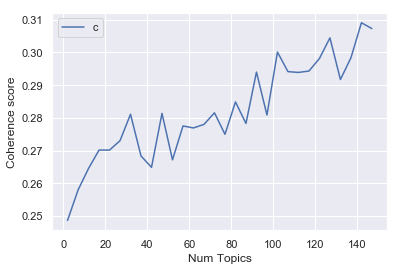

In [66]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary_one, corpus=corpus_one, texts=one, start=2, limit=150, step=5)
# Show graph
import matplotlib.pyplot as plt
limit=150; start=2; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary_one, corpus=corpus_one, texts=one, start=2, limit=150, step=5)
# Show graph
import matplotlib.pyplot as plt
limit=150; start=2; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [140]:
lda_1960 = pd.read_csv('../scripts/1960_congo_lda_words.csv')
lda_1961 = pd.read_csv('../scripts/1961_congo_lda_words.csv')
lda_1962 = pd.read_csv('../scripts/1962_congo_lda_words.csv')
lda_1963 = pd.read_csv('../scripts/1963_congo_lda_words.csv')
lda_1964 = pd.read_csv('../scripts/1964_congo_lda_words.csv')
lda_1965 = pd.read_csv('../scripts/1965_congo_lda_words.csv')
lda_1966 = pd.read_csv('../scripts/1966_congo_lda_words.csv')
frames = [lda_1960, lda_1961, lda_1962, lda_1963, lda_1964, lda_1965, lda_1966]
years_df = pd.concat(frames)
len(years_df)

58260

In [146]:
def normalize_topics(rows):
#     print(rows.sum())
    
#     word_sum = rows.word_weight.sum()
#     rows['normalized_word_weight'] = rows.word_weight / word_sum
    return rows.sum()

test =years_df.groupby(['year', 'doc_page','topic_id', 'topic_weight'], as_index=False)['word_weight'].apply(normalize_topics)
# all_2 = pd.merge(years_df, test, on=['word', 'word_weight'])
len(test)

2913

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129028908>]],
      dtype=object)

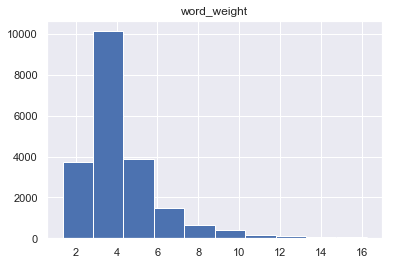

In [173]:
remove = ['...','«',"'s","'ll",'»',"n't",'--','—','..','112/6',
 '62.50','100/-',]

all_df = all_df.loc[all_df.word.isin(remove) ==False ]
all_df.sort_values(by=['word_weight'], ascending=False)
all_df.hist(column='word_weight')

In [187]:
len(all_df.word.unique().tolist())

subset = all_df.loc[all_df.word_weight > 4]
len(subset.word.unique().tolist())
subset.sort_values(by=['word_weight', 'year'], ascending=False)

doc_page  topic_id  topic_weight     word  word_weight  year
500         7.0      33.0      0.924767    congo    16.234044  1960
1760       40.0      33.0      0.821841    congo    16.234044  1960
3200       70.0      33.0      0.916893    congo    16.234044  1960
5260      113.0      33.0      0.996475    congo    16.234044  1960
0           0.0      22.0      0.486299  african    16.048804  1961
520        12.0      22.0      0.996126  african    16.048804  1961
560        13.0      22.0      0.554147  african    16.048804  1961
600        14.0      22.0      0.489564  african    16.048804  1961
1940       46.0      22.0      0.787478  african    16.048804  1961
2200       52.0      22.0      0.880815  african    16.048804  1961
3500       82.0      22.0      0.836740  african    16.048804  1961
6600      153.0      22.0      0.977727  african    16.048804  1961
7780      183.0      22.0      0.764311  african    16.048804  1961
11360     256.0      22.0      0.998199  african    16.048804  1961
12140     277.0      22.0      0.685549  african    16.048804  1961
13340     294.0      22.0      0.672146  african    16.048804  1961
620        11.0      42.0      0.996632  african    15.998887  1963
840        16.0      42.0      0.488760  african    15.998887  1963
2760       50.0      42.0      0.737249  african    15.998887  1963
4080       69.0      42.0      0.846005  african    15.998887  1963
4140       70.0      42.0      0.823145  african    15.998887  1963
4300       75.0      42.0      0.996711  african    15.998887  1963
4580       84.0      42.0      0.997655  african    15.998887  1963
5200       97.0      42.0      0.516871  african    15.998887  1963
5280       98.0      42.0      0.547279  african    15.998887  1963
5700      109.0      42.0      0.997003  african    15.998887  1963
6740      122.0      42.0      0.923985  african    15.998887  1963
6780      123.0      42.0      0.601774  african    15.998887  1963
7080      130.0      42.0      0.997083  african    15.998887  1963
7480      138.0      42.0      0.995484  african    15.998887  1963
...         ...       ...           ...      ...          ...   ...
6207      124.0      23.0      0.434986      one     4.007136  1964
6327      126.0      23.0      0.981226      one     4.007136  1964
2629       58.0      42.0      0.548585       un     4.006732  1960
5069      110.0      42.0      0.513530       un     4.006732  1960
199         7.0       2.0      0.938750  morocco     4.006079  1962
699        23.0       2.0      0.975500  morocco     4.006079  1962
1379       45.0       2.0      0.523812  morocco     4.006079  1962
1419       46.0       2.0      0.989574  morocco     4.006079  1962
2139       63.0       2.0      0.966207  morocco     4.006079  1962
2339       71.0       2.0      0.989574  morocco     4.006079  1962
2699       81.0       2.0      0.989574  morocco     4.006079  1962
2999       87.0       2.0      0.989574  morocco     4.006079  1962
7179      173.0       2.0      0.951000  morocco     4.006079  1962
8779      223.0       2.0      0.630630  morocco     4.006079  1962
9039      226.0       2.0      0.574097  morocco     4.006079  1962
9599      232.0       2.0      0.989574  morocco     4.006079  1962
9779      236.0       2.0      0.989684  morocco     4.006079  1962
10099     243.0       2.0      0.990577  morocco     4.006079  1962
10759     256.0       2.0      0.989348  morocco     4.006079  1962
11759     282.0       2.0      0.990577  morocco     4.006079  1962
2108       37.0      44.0      0.997672    world     4.005156  1964
3068       57.0      44.0      0.997699    world     4.005156  1964
5628      108.0      44.0      0.670566    world     4.005156  1964
6728      135.0      44.0      0.497421    world     4.005156  1964
507         7.0      48.0      0.996722    would     4.004079  1964
2807       51.0      48.0      0.551342    would     4.004079  1964
7667      150.0      48.0      0.426573    would     4.004079  

In [169]:

all_df = years_df.loc[years_df.topic_weight > 0.4]
all_df.word_weight = all_df.word_weight * 1000
all_df.word.unique().tolist()

['«',
 'african',
 'united',
 'president',
 "'s",
 'said',
 'congo',
 'two',
 'nations',
 'peoples',
 'arab',
 'world',
 'states',
 'national',
 'independence',
 'nasser',
 'uar',
 'israel',
 'also',
 'would',
 '...',
 'government',
 'al',
 'reproduced',
 'powers',
 'tshombe',
 "'ll",
 'katanga',
 'akhbar',
 'belgian',
 'people',
 'kibutz',
 'africa',
 'new',
 '»',
 'country',
 'arabs',
 'sudan',
 'countries',
 'revolution',
 'general',
 'assembly',
 'un',
 'soviet',
 'forces',
 'radio',
 'imperialism',
 'shah',
 'fact',
 'israeli',
 'one',
 'king',
 'french',
 'algeria',
 'france',
 'belgium',
 'liberty',
 'editorial',
 'freedom',
 'may',
 'kasavubu',
 'lumumba',
 'el',
 'abdel',
 'rose',
 "n't",
 'de',
 'gaulle',
 'state',
 'rahman',
 'mr.',
 '--',
 'cairo',
 'u.a.r',
 'observer',
 'troops',
 'mobutu',
 'portuguese',
 'press',
 'opinion',
 'force',
 'iran',
 'time',
 'british',
 'american',
 'policy',
 'britain',
 'hussein',
 'civilisation',
 'war',
 'situation',
 'air',
 'december',

In [96]:
years_df = years_df.drop(['word', 'word_weight'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12445ecc0>]],
      dtype=object)

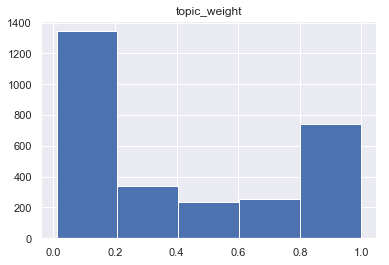

In [100]:

years_df = years_df.drop_duplicates(subset=['year', 'doc_page', 'topic_id', 'topic_weight'], keep='first')
years_df.hist(column='topic_weight', bins=5)

In [21]:
words_1960 =list(lda_1960.word.unique())
words_1961 =list(lda_1961.word.unique())
words_1962 =list(lda_1962.word.unique())
words_1963 =list(lda_1963.word.unique())
words_1964 =list(lda_1964.word.unique())
words_1965 =list(lda_1965.word.unique())
words_1966 =list(lda_1966.word.unique())

In [26]:
words = [
    words_1960,
    words_1961,
    words_1962,
    words_1963,
    words_1964,
    words_1965,
    words_1966,
]
for i, w in enumerate(words):
    if i+1< len(words):
        print(len(w), len(words[i+1]), len(list(set(w)-set(words[i+1]))))

118 89 56
89 144 36
144 101 81
101 90 48
90 96 38
96 126 43


In [33]:
lda_1960.sort_values(by=['word_weight', 'topic_weight'])

doc_page  topic_id  topic_weight          word  word_weight  year
3499      77.0      45.0      0.219042    government     0.001981  1960
3498      77.0      45.0      0.219042           one     0.001999  1960
3497      77.0      45.0      0.219042  independence     0.002092  1960
3496      77.0      45.0      0.219042             »     0.002178  1960
3495      77.0      45.0      0.219042   imperialism     0.002183  1960
1559      35.0      21.0      0.510000           one     0.002228  1960
1558      35.0      21.0      0.510000       belgian     0.002253  1960
3494      77.0      45.0      0.219042          also     0.002283  1960
2539      57.0      32.0      0.027603     palestine     0.002312  1960
1557      35.0      21.0      0.510000       african     0.002326  1960
2538      57.0      32.0      0.027603     countries     0.002341  1960
1019      19.0      35.0      0.048785        people     0.002353  1960
1556      35.0      21.0      0.510000           new     0.002376  1960
2537      57.0      32.0      0.027603       peoples     0.002386  1960
1018      19.0      35.0      0.048785     president     0.002412  1960
1017      19.0      35.0      0.048785             «     0.002425  1960
2536      57.0      32.0      0.027603    government     0.002440  1960
2535      57.0      32.0      0.027603   imperialism     0.002441  1960
2659      59.0      12.0      0.733592         force     0.002441  1960
899       17.0      12.0      0.948421         force     0.002441  1960
1555      35.0      21.0      0.510000        battle     0.002455  1960
1016      19.0      35.0      0.048785            ed     0.002476  1960
2279      53.0       3.0      0.016427            al     0.002478  1960
3619      81.0       3.0      0.019777            al     0.002478  1960
759       14.0       3.0      0.032451            al     0.002478  1960
3879      85.0       3.0      0.032755            al     0.002478  1960
4279      95.0       3.0      0.037488            al     0.002478  1960
4819     107.0       3.0      0.064818            al     0.002478  1960
3799      84.0       3.0      0.089984            al     0.002478  1960
5099     111.0       3.0      0.123294            al     0.002478  1960
...        ...       ...           ...           ...          ...   ...
160        3.0      11.0      0.117395             «     0.015443  1960
760       14.0      11.0      0.121474             «     0.015443  1960
1300      27.0      11.0      0.128054             «     0.015443  1960
0          0.0      11.0      0.180889             «     0.015443  1960
1420      31.0      11.0      0.227395             «     0.015443  1960
3020      66.0      11.0      0.283605             «     0.015443  1960
3060      68.0      11.0      0.510000             «     0.015443  1960
840       16.0      11.0      0.638843             «     0.015443  1960
1340      28.0      11.0      0.992687             «     0.015443  1960
200        3.0      33.0      0.037697         congo     0.016234  1960
2440      56.0      33.0      0.060026         congo     0.016234  1960
1100      21.0      33.0      0.069136         congo     0.016234  1960
2700      59.0      33.0      0.085569         congo     0.016234  1960
300        5.0      33.0      0.152868         congo     0.016234  1960
4500      99.0      33.0      0.260158         congo     0.016234  1960
1760      40.0      33.0      0.821841         congo     0.016234  1960
3200      70.0      33.0      0.916893         congo     0.016234  1960
500        7.0      33.0      0.924767         congo     0.016234  1960
5260     113.0      33.0      0.996475         congo     0.016234  1960
4740     105.0      29.0      0.014740             «     0.021575  1960
5400     116.0      29.0      0.021039             «     0.021575  1960
1440      31.0      29.0      0.040488             «     0.021575  1960
2080      49.0      29.0      0.138630             «     0.021575  1960
2220      52.0      29.0      0.149879        

In [47]:
page_one = lda_1960.loc[lda_1960.doc_page == 0]
word_sum = page_one.word_weight.sum()
page_one['normalized_word_weight'] = page_one.word_weight / word_sum
page_one.topic_weight = page_one.topic_weight.round(2)
page_one.sort_values(by=['topic_weight', 'normalized_word_weight'], ascending=False)

doc_page  topic_id  topic_weight          word  word_weight  year  \
20       0.0      17.0          0.81             «     0.011686  1960   
21       0.0      17.0          0.81       african     0.010178  1960   
22       0.0      17.0          0.81        united     0.008768  1960   
23       0.0      17.0          0.81     president     0.008453  1960   
24       0.0      17.0          0.81            's     0.008330  1960   
25       0.0      17.0          0.81          said     0.007031  1960   
26       0.0      17.0          0.81         congo     0.006873  1960   
27       0.0      17.0          0.81           two     0.006472  1960   
28       0.0      17.0          0.81       nations     0.005945  1960   
29       0.0      17.0          0.81       peoples     0.005423  1960   
30       0.0      17.0          0.81          arab     0.005296  1960   
31       0.0      17.0          0.81         world     0.005054  1960   
32       0.0      17.0          0.81        states     0.004984  1960   
33       0.0      17.0          0.81      national     0.004349  1960   
34       0.0      17.0          0.81  independence     0.004140  1960   
35       0.0      17.0          0.81        nasser     0.004019  1960   
36       0.0      17.0          0.81           uar     0.004018  1960   
37       0.0      17.0          0.81        israel     0.003766  1960   
38       0.0      17.0          0.81          also     0.003502  1960   
39       0.0      17.0          0.81         would     0.003499  1960   
0        0.0      11.0          0.18             «     0.015443  1960   
1        0.0      11.0          0.18          arab     0.011092  1960   
2        0.0      11.0          0.18       african     0.009729  1960   
3        0.0      11.0          0.18            's     0.008284  1960   
4        0.0      11.0          0.18        israel     0.007503  1960   
5        0.0      11.0          0.18         congo     0.006599  1960   
6        0.0      11.0          0.18        united     0.006393  1960   
7        0.0      11.0          0.18            --     0.005990  1960   
8        0.0      11.0          0.18        states     0.005479  1960   
9        0.0      11.0          0.18       nations     0.005207  1960   
10       0.0      11.0          0.18         cairo     0.005022  1960   
11       0.0      11.0          0.18           uar     0.004232  1960   
12       0.0      11.0          0.18        forces     0.003983  1960   
13       0.0      11.0          0.18         world     0.003835  1960   
14       0.0      11.0          0.18           two     0.003705  1960   
15       0.0      11.0          0.18        africa     0.003691  1960   
16       0.0      11.0          0.18          said     0.003603  1960   
17       0.0      11.0          0.18         u.a.r     0.003324  1960   
18       0.0      11.0          0.18      observer     0.003260  1960   
19       0.0      11.0          0.18           ...     0.003004  1960   

    normalized_word_weight  
20                0.048455  
21                0.042203  
22                0.036356  
23                0.035050  
24                0.034540  
25                0.029153  
26                0.028501  
27                0.026838  
28                0.024653  
29                0.022485  
30                0.021959  
31                0.020958  
32                0.020666  
33                0.018035  
34                0.017165  
35                0.016666  
36                0.016660  
37                0.015616  
38                0.014521  
39                0.014510  
0                 0.064036  
1                 0.045996  
2                 0.040342  
3                 0.034351  
4                 0.031112  
5                 0.027364  
6                 0.026507  
7                 0.024837  
8                 0.022719  
9                 0.021593  
10                0.020826  
11                0.017548  
12                0.016516  
13                0.0159

In [120]:
page_one = lda_1960.loc[lda_1960.doc_page == 54]
word_sum = page_one.word_weight.sum()
page_one['normalized_word_weight'] = page_one.word_weight / word_sum
page_one.topic_weight = page_one.topic_weight.round(2)
word_sum
# page_one.sort_values(by=['topic_weight', 'normalized_word_weight'], ascending=False)

0.20753974746912718

In [123]:
def normalize_topics(rows):
    
    word_sum = rows.word_weight.sum()
    rows['normalized_word_weight'] = rows.word_weight / word_sum
    return rows
page_one = lda_1960.loc[lda_1960.doc_page == 54]
test =page_one.groupby(['year', 'doc_page','topic_id', 'topic_weight'])['word','word_weight'].apply(normalize_topics).reset_index()
test2 = pd.merge(lda_1960, test, on=['word', 'word_weight'])
test2

doc_page  topic_id  topic_weight          word  word_weight  year  index  \
0        36.0      36.0      0.358553          arab     0.011234  1960   2340   
1        54.0      36.0      0.764972          arab     0.011234  1960   2340   
2        63.0      36.0      0.996260          arab     0.011234  1960   2340   
3       104.0      36.0      0.991901          arab     0.011234  1960   2340   
4       116.0      36.0      0.300828          arab     0.011234  1960   2340   
5        36.0      36.0      0.358553             «     0.009330  1960   2341   
6        54.0      36.0      0.764972             «     0.009330  1960   2341   
7        63.0      36.0      0.996260             «     0.009330  1960   2341   
8       104.0      36.0      0.991901             «     0.009330  1960   2341   
9       116.0      36.0      0.300828             «     0.009330  1960   2341   
10       36.0      36.0      0.358553       african     0.008042  1960   2342   
11       54.0      36.0      0.764972       african     0.008042  1960   2342   
12       63.0      36.0      0.996260       african     0.008042  1960   2342   
13      104.0      36.0      0.991901       african     0.008042  1960   2342   
14      116.0      36.0      0.300828       african     0.008042  1960   2342   
15       36.0      36.0      0.358553            's     0.007666  1960   2343   
16       54.0      36.0      0.764972            's     0.007666  1960   2343   
17       63.0      36.0      0.996260            's     0.007666  1960   2343   
18      104.0      36.0      0.991901            's     0.007666  1960   2343   
19      116.0      36.0      0.300828            's     0.007666  1960   2343   
20       36.0      36.0      0.358553         cairo     0.006692  1960   2344   
21       54.0      36.0      0.764972         cairo     0.006692  1960   2344   
22       63.0      36.0      0.996260         cairo     0.006692  1960   2344   
23      104.0      36.0      0.991901         cairo     0.006692  1960   2344   
24      116.0      36.0      0.300828         cairo     0.006692  1960   2344   
25       36.0      36.0      0.358553         congo     0.005731  1960   2345   
26       54.0      36.0      0.764972         congo     0.005731  1960   2345   
27       63.0      36.0      0.996260         congo     0.005731  1960   2345   
28      104.0      36.0      0.991901         congo     0.005731  1960   2345   
29      116.0      36.0      0.300828         congo     0.005731  1960   2345   
..        ...       ...           ...           ...          ...   ...    ...   
110      54.0      28.0      0.229028            's     0.005132  1960   2325   
111      76.0      28.0      0.951000            's     0.005132  1960   2325   
112      54.0      28.0      0.229028     president     0.004841  1960   2326   
113      76.0      28.0      0.951000     president     0.004841  1960   2326   
114      54.0      28.0      0.229028         would     0.004277  1960   2327   
115      76.0      28.0      0.951000         would     0.004277  1960   2327   
116      54.0      28.0      0.229028          arab     0.004252  1960   2328   
117      76.0      28.0      0.951000          arab     0.004252  1960   2328   
118      54.0      28.0      0.229028        israel     0.004200  1960   2329   
119      76.0      28.0      0.951000        israel     0.004200  1960   2329   
120      54.0      28.0      0.229028           ...     0.004087  1960   2330   
121      76.0      28.0      0.951000           ...     0.004087  1960   2330   
122      54.0      28.0      0.229028  independence     0.003739  1960   2331   
123      76.0      28.0      0.951000  independence     0.003739  1960   2331   
124      54.0      28.0      0.229028     countries     0.003417  1960   2332   
125      76.0      28.0      0.951000     countries     0.003417  1960   2332   
126      54.0      28.0      0.229028       foreign     0.003230  1960   2333   
127      76.0      28.0      0.95100

In [42]:
topics_1960 = lda_1960.drop(['word', 'word_weight'], axis=1)
topics_1960 = topics_1960.drop_duplicates(subset=['year', 'doc_page', 'topic_id', 'topic_weight'], keep='first')

# topic_sum = page_one.topic_weight.sum()
topics_1960['normalized_topic_weight'] = topics_1960.topic_weight.round(2)
topics_1960

doc_page  topic_id  topic_weight  year  normalized_topic_weight
0          0.0      11.0      0.180889  1960                     0.18
20         0.0      17.0      0.810304  1960                     0.81
40         1.0       0.0      0.984923  1960                     0.98
60         2.0       4.0      0.053828  1960                     0.05
80         2.0      17.0      0.912984  1960                     0.91
100        2.0      30.0      0.013143  1960                     0.01
120        2.0      37.0      0.013455  1960                     0.01
140        3.0       9.0      0.018947  1960                     0.02
160        3.0      11.0      0.117395  1960                     0.12
180        3.0      17.0      0.304790  1960                     0.30
200        3.0      33.0      0.037697  1960                     0.04
220        3.0      42.0      0.091049  1960                     0.09
240        3.0      47.0      0.427861  1960                     0.43
260        4.0      37.0      0.997468  1960                     1.00
280        5.0      17.0      0.462647  1960                     0.46
300        5.0      33.0      0.152868  1960                     0.15
320        5.0      48.0      0.382382  1960                     0.38
340        6.0      17.0      0.352635  1960                     0.35
360        6.0      20.0      0.185738  1960                     0.19
380        6.0      22.0      0.127297  1960                     0.13
400        6.0      27.0      0.014541  1960                     0.01
420        6.0      30.0      0.018566  1960                     0.02
440        6.0      40.0      0.262348  1960                     0.26
460        6.0      48.0      0.030054  1960                     0.03
480        7.0      17.0      0.072603  1960                     0.07
500        7.0      33.0      0.924767  1960                     0.92
520        8.0       5.0      0.976667  1960                     0.98
540        9.0       3.0      0.997481  1960                     1.00
560       10.0       3.0      0.220996  1960                     0.22
580       10.0      17.0      0.611126  1960                     0.61
...        ...       ...           ...   ...                      ...
4860     107.0      26.0      0.030489  1960                     0.03
4880     107.0      34.0      0.686732  1960                     0.69
4900     108.0       3.0      0.320316  1960                     0.32
4920     108.0      17.0      0.164594  1960                     0.16
4940     108.0      38.0      0.512934  1960                     0.51
4960     109.0       9.0      0.159382  1960                     0.16
4980     109.0      17.0      0.019453  1960                     0.02
5000     109.0      27.0      0.817989  1960                     0.82
5020     110.0      17.0      0.467759  1960                     0.47
5040     110.0      22.0      0.015844  1960                     0.02
5060     110.0      42.0      0.513530  1960                     0.51
5080     111.0       3.0      0.123294  1960                     0.12
5100     111.0      47.0      0.874578  1960                     0.87
5120     112.0       9.0      0.084534  1960                     0.08
5140     112.0      15.0      0.167433  1960                     0.17
5160     112.0      17.0      0.204832  1960                     0.20
5180     112.0      22.0      0.019412  1960                     0.02
5200     112.0      24.0      0.014013  1960                     0.01
5220     112.0      34.0      0.204285  1960                     0.20
5240     112.0      47.0      0.303736  1960                     0.30
5260     113.0      33.0      0.996475  1960                     1.00
5280     114.0      17.0      0.997200  1960                     1.00
5300     115.0      27.0      0.969375  1960                     0.97
5320     116.0       4.0      0.271029  1960                     0.27
5340     116.0      15.0      0.013287  1960                     0.01
5360     116.0  

In [189]:
words_1960 =list(lda_1960.word.unique())
words_1961 =list(lda_1961.word.unique())
words_1962 =list(lda_1962.word.unique())
words_1963 =list(lda_1963.word.unique())
words_1964 =list(lda_1964.word.unique())
words_1965 =list(lda_1965.word.unique())
words_1966 =list(lda_1966.word.unique())

words = [
    words_1960,
    words_1961,
    words_1962,
    words_1963,
    words_1964,
    words_1965,
    words_1966,
]
for i, w in enumerate(words):
    if i+1< len(words):
        print(len(w), len(words[i+1]), list(set(w)-set(words[i+1])))

118 89 ['arabs', 'east', 'iran', 'middle', 'force', 'general', 'air', 'u.a.r', 'years', 'akhbar', 'revolution', 'palestine', 'conspiracy', 'editorial', 'powers', 'observer', 'soviet', 'kasavubu', 'hussein', 'war', 'time', "n't", 'mobutu', 'saprin', 'sudan', 'africans', 'jewish', 'continent', 'radio', 'reproduced', 'liberty', 'civilisation', 'belgium', 'rose', 'message', 'gaulle', 'press', 'king', 'mr.', 'situation', 'may', 'kamal', '--', 'portuguese', 'bases', 'troops', '—', 'fact', 'december', 'shah', 'american', 'rahman', 'kibutz', 'aid', 'battle', "'ll"]
89 144 ['freedom', 're-', 'leaders', 'opinion', 'cotton', 'israeli', 'belgian', 'talks', 'forces', 'imperialist', 'angola', 'support', 'peace', 'security', 'council', 'arms', 'al', 'lumumba', 'lebanon', 'union', 'children', 'resolution', 'hammarskjoeld', 'presidents', 'le', 'laos', 'con-', 'assembly', 'policy', 'nkrumah', 'paper', 'national', 'peoples', 'women', 'imperialism', 'nasser']
144 101 ['however', 'church', 'struggle', 'med